In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the required libraries
import pandas as pd
import numpy as np

# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.preprocessing import StandardScaler

# Reading and understanding the data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# check the shape of the dataset
df.shape

(9240, 37)

dataset have 9240 rows and 37 columns

In [4]:
#check the Information on the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Observations

A large number of columns have null values. Those columns should ideally be dropped
Prospect ID and Lead Number both serve the same purpose. They are both unique identifiers. We will drop Prospect ID
Column names are just too long. We will modify the column names
Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

In [5]:
# check statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Prospect ID is Customer ID, it should be unique. Below, we are checking if there are any Duplicate IDs in the Prospect ID

In [6]:
# check whether there are any duplicates or not
df.duplicated().sum()

0

In [7]:
# Checking if we have duplicates under Prospect ID.
df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [8]:
# Checking if we have duplicates under Lead Number.
df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate values in Prospect ID and Lead Number

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People.Prospect ID & Lead Number are variables that define the same customer who was contacted. We can drop both the variables as they do not provide us any further insghts and hence it may not be appropriate to keep both the variables.

now move the next step

# Data Cleaning & Treatment:

In [9]:
#dropping Lead Number and Prospect ID from the dataset
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
# Checking data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

From the problem statement, it is clear to understand that Many of the categorical variables have a level called 'Select'
which needs to be handled because it is as good as a null value. hence 'Select' can be converted to Null.

In [11]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [12]:
# Checking data again after inserting Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [13]:
#Checking for total null values in the dataset
df.isnull().sum().sum()

54419

In [14]:
#Checking for null values present in the each column
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#For further analysis finding the ratio of Null values present in each column.
null_ratio = round(100*(df.isnull().sum())/len(df.index),2)
null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Observation:-
As can be seen, there are quite a few columns with high number of missing data. Since there are no ways to get data back from reliable sources, we can drop all those columns that have missing values > 45%

In [16]:
# dropping cols with more than 45% missing values
columns = df.columns
for i in columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [17]:
# Checking for null ratio after removing the columns which has more than 45% of the null values
null_ratio = round(100*(df.isnull().sum())/len(df.index),2)
null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Observations:-
There are five columns that still have high null values: country, specialization, What is your current occupation,               
What matters most to you in choosing a course, tags and city. We will look at them individually to see what can be done.

#  Categorical Variables Analysis :

Country column

In [18]:
#Value counts of Country column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
df.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Observation:-
From the above, we can understand that India is the most occuring country in the Country Column.
The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [20]:
# From the above, we can understand that India is the most occuring country in the Country Column.
# Hence we can replace null values with India
df['Country'] = df['Country'].replace(np.nan, 'India')

In [21]:
# Checking the value count after imputing the null values
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

from above after imputing the null values Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.so Removing Country column frmom data

In [22]:
df.drop('Country', axis = 1, inplace = True)

In [23]:
# Checking if Country in present in the data column
"Country" in df.columns

False

In [24]:
#Rechecking Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

# specialization column

In [25]:
#checking specialaztion column
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [26]:
df.Specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

--There seems to be a scenario in this variable.
Some customer may not have mentioned specialization as it was not in the list or there aren't any 
Hence we can impute the NA's as 'Not Specified'.

--For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias


In [27]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

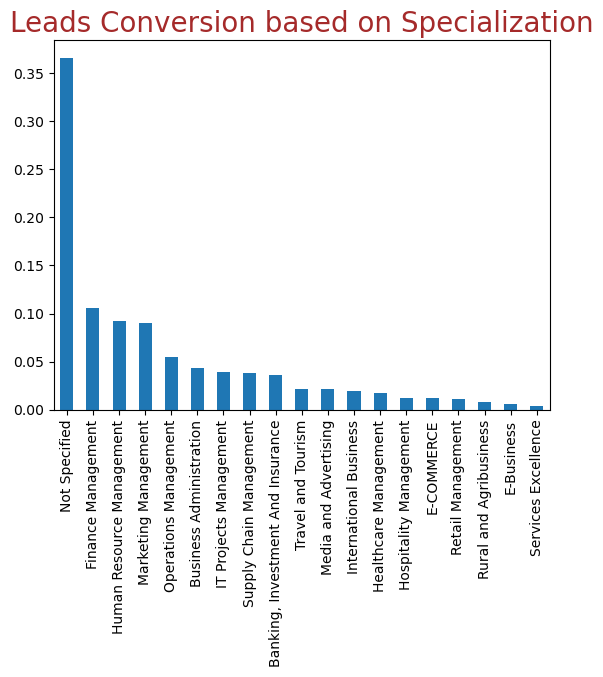

In [28]:
#visualising the Specialization column
df.Specialization.value_counts(normalize= True).plot.bar()
plt.title("Leads Conversion based on Specialization",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [29]:
# categorize all management courses
df.loc[(df.Specialization == 'Finance Management') | (df.Specialization == 'Human Resource Management') | 
       (df.Specialization == 'Marketing Management') |  (df.Specialization == 'Operations Management') |
       (df.Specialization == 'IT Projects Management') | (df.Specialization == 'Supply Chain Management') |
       (df.Specialization == 'Healthcare Management') | (df.Specialization == 'Hospitality Management') |
       (df.Specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [30]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: specialization, dtype: float64

Insights - Management has the higher number of leads converted. This is importannt and should not be removed.



In [31]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations','Industry Specializations','Business Specializations'], p = [0.7258, 0.1529,0.1213] , size = len(df))))

# What is your current occupation column

In [32]:
# Checking "What is your current occupation" as it has the most Null values in the above info
#Looking for value counts inside the Occupation
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [34]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In the above info we can still find NA values, we can impute NA's with "Unemployed"

In [35]:
#Replacing Null values with "Unemployed"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [36]:
#Value counts after imputation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
#Ratio of categories after imputation
df['What is your current occupation'].value_counts(normalize = True, dropna = False, ascending = False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

From the above two analysis, we can understand :-

--Unemployed leads are the most in the leads

--Working Professionals have high chances going for the course.

--Housewives, Businessman, Student and Other categories may not be converted to join the course

# What matters most to you in choosing a course column

In [38]:
#checking the variable "What matters most to you in choosing a course"
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
#replacing Null values with "Better Career Prospects"
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, "Better Career Prospects")

In [41]:
#Value counts after imputation
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

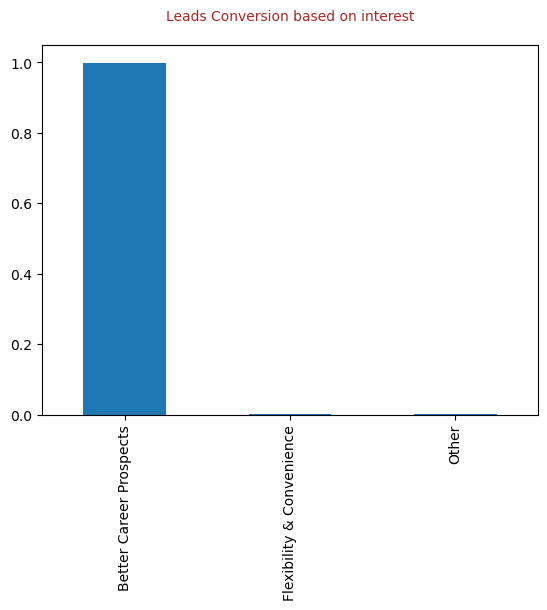

In [42]:
df['What matters most to you in choosing a course'].value_counts(normalize= True).plot.bar()
plt.title("Leads Conversion based on interest\n",fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [43]:
#checking Ratio of variable 
df['What matters most to you in choosing a course'].value_counts(normalize=True, dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

"Better Career Prospects" influences the column drastically, we can remove that column as it will create bias



In [44]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [45]:
# Checking if Country in present in the data column
'What matters most to you in choosing a course' in df.columns

False

In [46]:
#Rechecking Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

# Tags column

In [47]:
#checking value counts of  variable 'Tags'
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [48]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

lead has not confirmed on the tag, we can impute Null values as "Not Specified"

In [49]:
#Replacing Nan values in Tag with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan, 'Not Specified')

In [50]:
#Since some tags have very minimal values, we can replace them as "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [51]:
#Rechecking Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

# City column

In [52]:
# Checking the City Column
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [53]:
df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [54]:
# Checking for the most frequest value in City 
df['City'].mode()

0    Mumbai
Name: City, dtype: object

 Mumbai has been tagged as the most frequently occuring value. hence we can impute Null values with Mumbai


In [55]:
df['City'].value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

Observations:- We will categorize cities based on logical decisions and impute proportionately

In [56]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.City == 'Thane & Outskirts') | (df.City == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.City == 'Other Cities') | (df.City == 'Other Metro Cities') | (df.City == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [57]:
df.City.value_counts(normalize = True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [58]:
# impute proportionately
df['City'] = df.City.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

In [59]:
#Rechecking Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

With low number of missing values and low representation of categories Handle categorical columns

In this step, we will go through the rest of the categorical columns one by one and

--Merge categories that have low representation

--Impute the missing values

In [60]:
# Checking the null values in the data
df.isnull().sum()

Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                                 0
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Tags                                           0
Update me on Supply 

In [61]:
(df.isnull().sum() / df.shape[0]) * 100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [62]:
#checking value counts of Lead Source column
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Lead source has very less null values, we can replace Null as Others

In [63]:
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Others')

In [64]:
#Also we can combining low frequency values present in the Lead Source
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'],'')

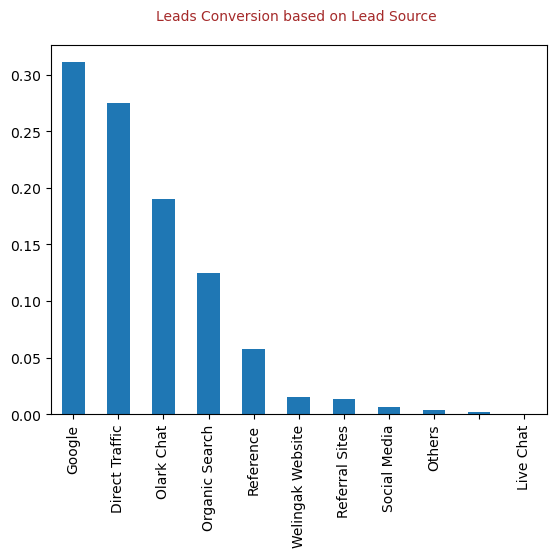

In [65]:
df['Lead Source'].value_counts(normalize= True).plot.bar()
plt.title("Leads Conversion based on Lead Source \n",fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Observations :
-Most of the leads generated are through Google and Direct traffic and the least through Live Chat
-Welingak website ahs the most conversion rate
-Lead conversion can be improved by maxising leads from Reference and welingak website
-Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion

In [66]:
# Checking Last Activity variable
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [67]:
# Checking on the ratio of categories
df['Last Activity'].value_counts(dropna=False, normalize=True) * 100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [68]:
# Replacing Null values to "others"
df["Last Activity"] = df["Last Activity"].replace(np.nan, 'Others')

In [69]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [70]:
# Checking the values of the Last Activity Variable
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [71]:
# Recheck the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [72]:
# Checking Lead Origin column
df['Lead Origin'].value_counts(normalize=True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [73]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df['Lead Origin'] == 'Lead Import') | (df['Lead Origin'] == 'Quick Add Form') | (df['Lead Origin'] == 'Lead Add Form'), 'Lead Origin'] = 'Lead Add Form and Others'

# Handle Binary columns 

--That have significant data imbalance drop those columns

--Drop all those columns that have only 1 unique entry

In [74]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 3
Lead Source = 11
Do Not Email = 2
Do Not Call = 2
Last Activity = 9
Specialization = 19
What is your current occupation = 6
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Tags = 8
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 8
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16
specialization = 3
city = 2


Observation:-

The following columns can be dropped as they have just 1 unique values

--Magazine

--Receive More Updates About Our Courses

--Update me on Supply Chain Content

--Get updates on DM Content

--I agree to pay the amount through cheque

Let's now check the data imbalance for the rest of the columns

In [75]:
# select rest of the binary columns in a new dataframe
df_bin = df[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview']]
# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64



Observations:--
Because of heavy data imbalance, we can drop the following columns as well

--Do Not Email

--Search

--Newspaper Article

--X Education Forums

--Newspaper

--Digital Advertisement

--Through Recommendations

In [76]:
drop_bin = ['Do Not Email', 'Search',  'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df.drop(drop_bin, axis = 1, inplace = True)

Handle numerical columns

# TotalVisits column

For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

In [77]:
df.TotalVisits.fillna(df.TotalVisits.median(), inplace = True)
df.TotalVisits = df.TotalVisits.astype('int')

# Page Views Per Visit column

Handle missing value

In [78]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [79]:
# Recheck the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Call                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   int32  
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

# Exploratory Data Analysis

Numerical columns

In [80]:
# Set style
plt.style.use('ggplot')

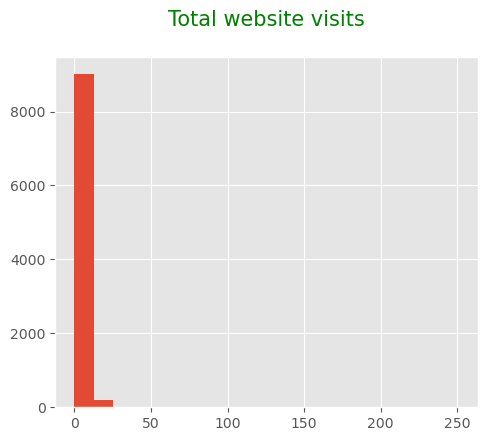

In [81]:
#distribution of each of these columns
fig = plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
plt.hist(df.TotalVisits, bins = 20)
plt.title('Total website visits\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

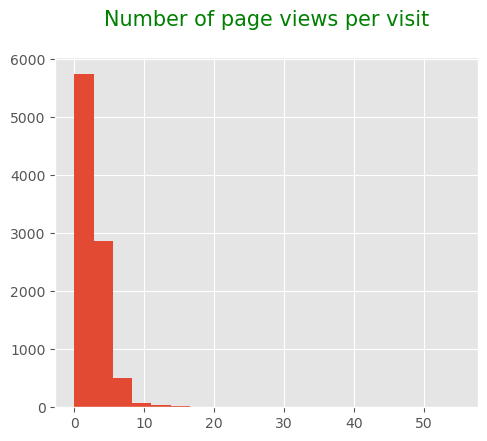

In [82]:
fig = plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Number of page views per visit\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

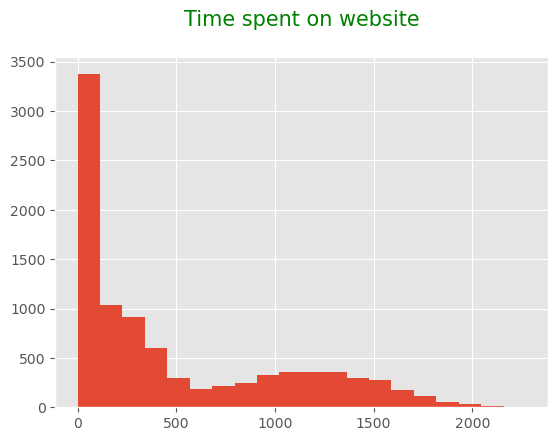

In [83]:
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df['Total Time Spent on Website'], bins = 20)
plt.title('Time spent on website\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [88]:
#f#ig = plt.figure(figsize = (10, 8))
#plt.subplot(2, 2, 1)
#plt.hist(df.Converted, bins = 20)
#plt.title('Converted\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
#plt.show()

Observations:-

High peaks and skewed data. There might be a possibility of outliers. We will check them next

# Heatmap

using heatmap check correlation between them. 

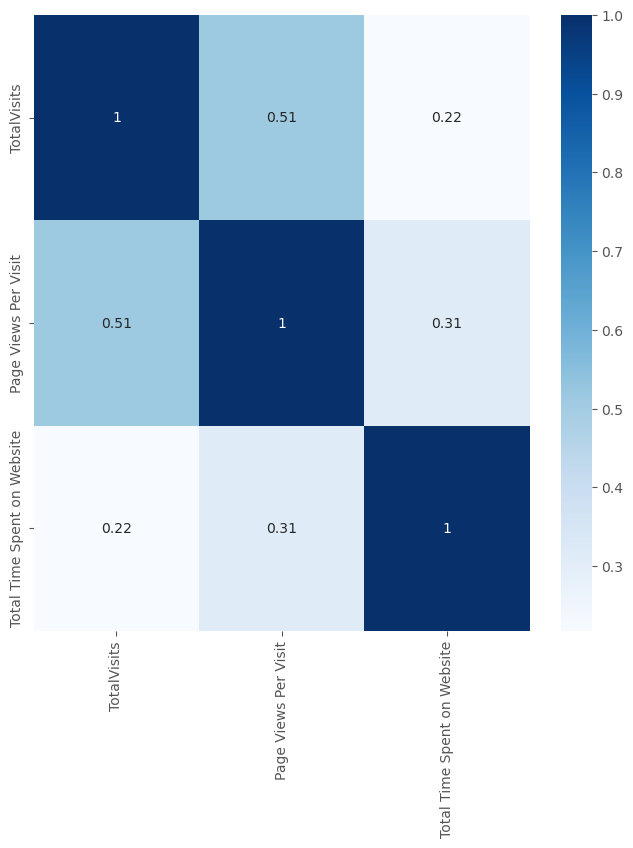

In [89]:
plt.figure(figsize = (8,8))
sns.heatmap(df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr(), cmap="Blues", annot = True)
plt.show()

Observations:-- No significaqnt correlation such that columns can be dropped

# Check the outliers

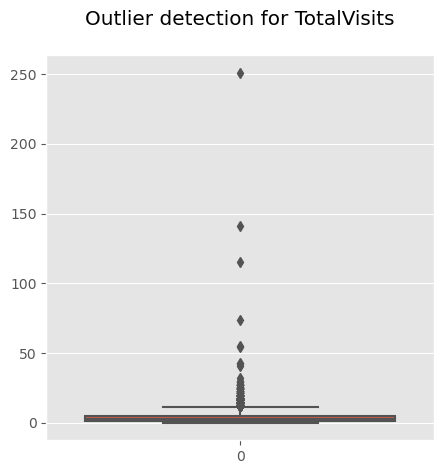

Median of TotalVisits is 3.0


In [90]:
plt.figure(figsize = (5,5))
sns.boxplot(df.TotalVisits)
plt.title('Outlier detection for TotalVisits\n')
plt.show()
print ('Median of TotalVisits is', df['TotalVisits'].median())

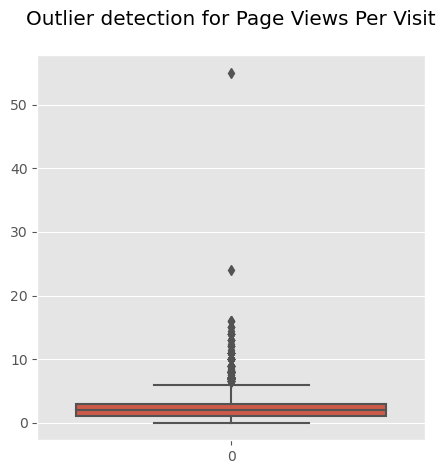

Median of Page Views Per Visit is 2.0


In [91]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Page Views Per Visit'])
plt.title('Outlier detection for Page Views Per Visit\n')
plt.show()
print ('Median of Page Views Per Visit is', df['Page Views Per Visit'].median())

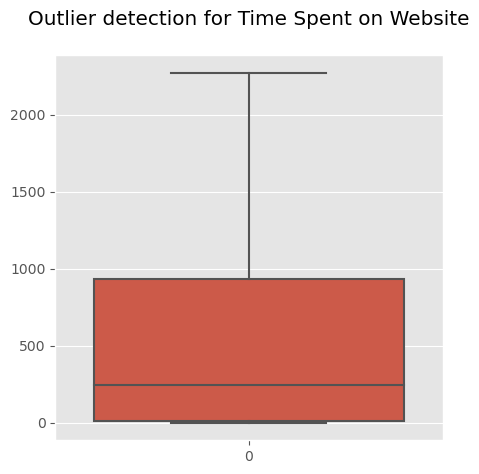

Median of Total Time Spent on Website is 248.0


In [92]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Total Time Spent on Website'])
plt.title('Outlier detection for Time Spent on Website\n')

plt.show()
print ('Median of Total Time Spent on Website is', df['Total Time Spent on Website'].median())

Observations

Looking at both the box plots and the statistics, there are upper bound outliers in both TotalVisits and Page Views Per Visit columns. We can also see that the data can be capped at 99 percentile.

In [93]:
# Analysing the Total Time Spent on Website variable
df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

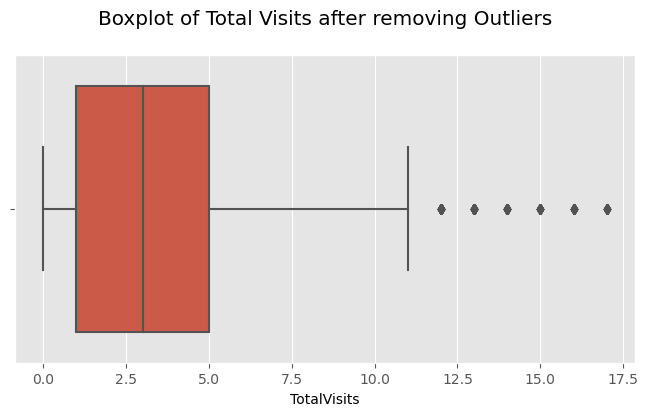

In [94]:
#Removing the Oultiers from the data

plt.figure(figsize=(8,4))

Q3 = df['TotalVisits'].quantile(0.99)

df = df[(df['TotalVisits'] <= Q3)]

Q1 = df['TotalVisits'].quantile(0.01)

df = df[(df['TotalVisits'] >= Q1)]

sns.boxplot(x=df['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers\n")
plt.show()


In [95]:
df.shape

(9157, 16)

In [96]:
#Analysing Page Views Per Visit
df['Page Views Per Visit'].describe()

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

# Since there are Outliers present in the data, we need to remove them. We will cap it at 1%

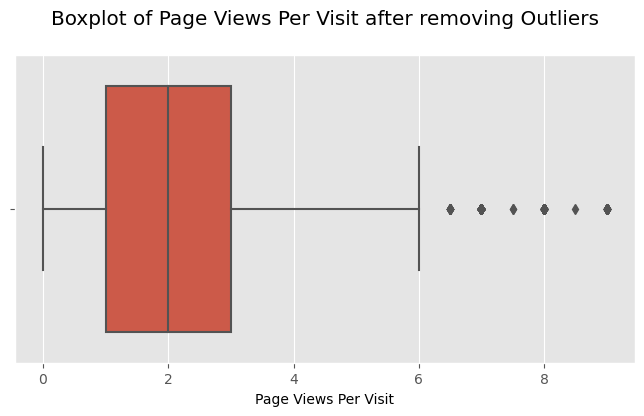

In [97]:
#Removing the Oultiers from the data

plt.figure(figsize=(8,4))

Q3 = df['Page Views Per Visit'].quantile(0.99)

df = df[(df['Page Views Per Visit'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)

df = df[(df['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=df['Page Views Per Visit'])
plt.title("Boxplot of Page Views Per Visit after removing Outliers\n")
plt.show()

In [98]:
#Checking on the shape of the dataset 
df.shape

(9090, 16)

In [99]:
df.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation              0
Tags                                         0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
specialization                               0
city                                      6799
dtype: int64

# Data Preparation
Converting Binary (Yes/No) to 0/1

In [100]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 3
Lead Source = 11
Do Not Call = 2
Last Activity = 9
Specialization = 19
What is your current occupation = 6
Tags = 8
City = 8
A free copy of Mastering The Interview = 2
Last Notable Activity = 16
specialization = 3
city = 2


In [101]:
binlist = ['Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,specialization,city
0,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,Industry Specializations,NaN
1,API,Organic Search,0,0,5,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,Management Specializations,NaN
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,Business Specializations,NaN
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,Industry Specializations,NaN
4,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,Management Specializations,NaN


# Model Preperation

# step 1- creating dummy variables

In [102]:
#First we need to get a list of categorical columns present in the data
catg_vals = df.select_dtypes(include=['object']).columns
catg_vals

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity', 'specialization', 'city'],
      dtype='object')

To know if mapping is required Printing Categorical variables

In [103]:
for i in catg_vals:
    print(i)
    print(df[i].value_counts())
    print(" ")

Lead Origin
Landing Page Submission     4769
API                         3548
Lead Add Form and Others     773
Name: Lead Origin, dtype: int64
 
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1753
Organic Search      1092
Reference            533
Welingak Website     142
Referral Sites       117
Social Media          57
Others                36
                      18
Live Chat              2
Name: Lead Source, dtype: int64
 
Last Activity
Email Opened                 3390
SMS Sent                     2707
Olark Chat Conversation       967
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 324
Others                        302
Email Link Clicked            264
Form Submitted on Website     114
Name: Last Activity, dtype: int64
 
Specialization
Not Specified                        3360
Finance Management                    959
Human Resource Management             830
Marketing Management                 

# Creating dummy variable for categorical columns 

categorical columns are 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'City','Last Notable Activity', 'specialization', 'city'.      

In [104]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'City','Last Notable Activity', 'specialization', 'city']], drop_first = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [105]:
# Dropping the columns for which dummies have been created
df.drop([ 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'City','Last Notable Activity', 'specialization', 'city'], axis = 1, inplace = True)
df.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2,1532,2.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1.0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [106]:
# Checking if we have any categorical variable present in the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   int32  
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 7   Lead Origin_Lead Add Form and Others                  9090 non-null   uint8  
 8   Lead Source_Direct Traffic                            9090

# There are no variables present, we can go ahead in creating the model

# Model Building: Logistic Regression

Splitting the data into Training and Testing Set - For this we need to import Train Test Split from SKLearn

In [107]:
from sklearn.model_selection import train_test_split
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Independent Variables
X = df.drop('Converted', axis = 1)
X.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1532,2.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
# Splitting into train and test data at 70/30 Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
302,0,7,250,2.33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,0,0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,5,470,5.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7656,0,6,352,6.00,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,0,4,973,1.33,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [111]:
X_test.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
6906,0,4,1530,2.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1873,0,2,186,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
771,0,7,49,7.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4495,0,4,144,4.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9061,0,2,1788,2.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
y_train.head()

302     0
6087    0
1033    0
7656    0
3241    1
Name: Converted, dtype: int64

In [113]:
y_test.head()

6906    1
1873    0
771     0
4495    0
9061    1
Name: Converted, dtype: int64

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           6363 non-null   int64  
 1   TotalVisits                                           6363 non-null   int32  
 2   Total Time Spent on Website                           6363 non-null   int64  
 3   Page Views Per Visit                                  6363 non-null   float64
 4   A free copy of Mastering The Interview                6363 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6363 non-null   uint8  
 6   Lead Origin_Lead Add Form and Others                  6363 non-null   uint8  
 7   Lead Source_Direct Traffic                            6363 non-null   uint8  
 8   Lead Source_Google                                    63

In [115]:
X_train.shape

(6363, 80)

In [116]:
y_train.shape

(6363,)

In [117]:
X_test.shape

(2727, 80)

In [118]:
y_test.shape

(2727,)

# Feature Scaling 

In [119]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,0,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7656,0,0.989402,-0.241619,2.014065,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,0,0.294642,0.897591,-0.492776,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [120]:
# checking the conversion rate
conversion =(sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.448844884488445

The conversion rate is 38.4%

# Scaling of Data using Standard Scaler from SciKit Learn

In [121]:
#Importing Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Selecting numerical cols for scaling 
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
302,-0.017732,1.336782,-0.428736,0.044021,-0.659091,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,-0.017732,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,-0.017732,0.642022,-0.025151,1.477269,-0.659091,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7656,-0.017732,0.989402,-0.241619,2.014065,1.517242,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,-0.017732,0.294642,0.897591,-0.492776,1.517242,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Building Logistic Regression using Stats Model & RFE:

In [122]:
# Importing Statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [123]:
# initiate logistic regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# running RFE with 15 variables 
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [124]:
#printing the Output
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False])

In [125]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('Do Not Call', False, 49),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form and Others', True, 1),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 65),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 20),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Others', False, 42),
 ('Last Activ

In [126]:
# checking the rfe Supported columns
rfe_supp_col = X_train.columns[rfe.support_]
rfe_supp_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form and Others',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [127]:
# listing the columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specializat

#  Now from here we can start building models for further analysis Assessing the model with statsmodel

In [128]:
#Model building
X_train_sm = sm.add_constant(X_train[rfe_supp_col])
log_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.4
Date:                Mon, 22 May 2023   Deviance:                       2488.8
Time:                        20:13:15   Pearson chi2:                 9.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6088
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6680      0.098    -17.042      0.000      -1.860      -1.476
Total Time Spent on Website                       1.1063      0.061     18.079      0.000       0.986       1.226
Lead Origin_Lead Add Form and Others              1.5018      0.330      4.545      0.000       0.854       2.149
Lead Source_Olark Chat                            1.1810      0.146      8.091      0.000       0.895       1.467
Lead Source_Others                                2.6816      1.023      2.621      0.009       0.677       4.687
Lead Source_Welingak Website                      5.0898      1.075      4.735      0.000       2.983       7.196
Last Activity_Email Bounced                      -2.0279      0.521     -3.889      0.000      -3.050      -1.006
Tags_Closed by Horizzon                           6.5189      0.733      8.888      0.000       5.081       7.956
Tags_Interested in other courses                 -2.2603      0.414     -5.459      0.000      -3.072      -1.449
Tags_Lost to EINS                                 6.2185      0.732      8.496      0.000       4.784       7.653
Tags_Other_Tags                                  -2.7615      0.233    -11.854      0.000      -3.218      -2.305
Tags_Ringing                                     -3.4384      0.239    -14.414      0.000      -3.906      -2.971
Tags_Will revert after reading the email          4.3152      0.175     24.723      0.000       3.973       4.657
Last Notable Activity_Modified                   -1.0560      0.133     -7.935      0.000      -1.317      -0.795
Last Notable Activity_Olark Chat Conversation    -1.8180      0.429     -4.237      0.000      -2.659      -0.977
Last Notable Activity_SMS Sent                    2.1747      0.135     16.125      0.000       1.910       2.439
=================================================================================================================
"""

When evaluating the RFE , we should remove the variable that has highest P-value. So in this table, we can see that Lead Source_Others has the highest P-value and that should be dropped for further analysis.

In [129]:
#dropping column with high p-value
rfe_supp_col = rfe_supp_col.drop('Lead Source_Others',1)

In [130]:
#model after removing the Lead Source Referral Sites
X_train_sm = sm.add_constant(X_train[rfe_supp_col])
log_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.9
Date:                Mon, 22 May 2023   Deviance:                       2495.7
Time:                        20:13:16   Pearson chi2:                 9.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6679      0.098    -17.064      0.000      -1.859      -1.476
Total Time Spent on Website                       1.1057      0.061     18.165      0.000       0.986       1.225
Lead Origin_Lead Add Form and Others              1.7632      0.320      5.505      0.000       1.135       2.391
Lead Source_Olark Chat                            1.1771      0.146      8.087      0.000       0.892       1.462
Lead Source_Welingak Website                      4.8084      1.069      4.496      0.000       2.712       6.904
Last Activity_Email Bounced                      -1.9007      0.509     -3.734      0.000      -2.898      -0.903
Tags_Closed by Horizzon                           6.4114      0.730      8.777      0.000       4.980       7.843
Tags_Interested in other courses                 -2.2723      0.414     -5.492      0.000      -3.083      -1.461
Tags_Lost to EINS                                 6.1887      0.731      8.471      0.000       4.757       7.621
Tags_Other_Tags                                  -2.7693      0.233    -11.892      0.000      -3.226      -2.313
Tags_Ringing                                     -3.4330      0.237    -14.462      0.000      -3.898      -2.968
Tags_Will revert after reading the email          4.2769      0.172     24.829      0.000       3.939       4.615
Last Notable Activity_Modified                   -1.0442      0.133     -7.872      0.000      -1.304      -0.784
Last Notable Activity_Olark Chat Conversation    -1.8081      0.428     -4.227      0.000      -2.647      -0.970
Last Notable Activity_SMS Sent                    2.1810      0.135     16.190      0.000       1.917       2.445
=================================================================================================================
"""

Now we can see that all the variables have their the p-values equal to 0. So we can check for the VIF Variance Inflation Factor for checking if there are any correlation between the variables

# VIF Variance Inflation Factor for checking correlation between variables

In [131]:
#Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_supp_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_supp_col].values, i) for i in range(X_train[rfe_supp_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form and Others,1.76
11,Last Notable Activity_Modified,1.65
10,Tags_Will revert after reading the email,1.58
13,Last Notable Activity_SMS Sent,1.48
2,Lead Source_Olark Chat,1.44
0,Total Time Spent on Website,1.39
3,Lead Source_Welingak Website,1.28
5,Tags_Closed by Horizzon,1.27
8,Tags_Other_Tags,1.17
6,Tags_Interested in other courses,1.12


Since all the values are below 5, we can go ahead to interpret Probabilities, Lead Score and Predictions on Train Data



# Model Evaluation

In [133]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.105083
6087    0.011927
1033    0.155025
7656    0.039656
3241    0.996929
5738    0.070295
7366    0.005039
3680    0.031755
4170    0.996643
43      0.099860
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1050828 , 0.01192718, 0.155025  , 0.03965625, 0.99692862,
       0.0702955 , 0.00503876, 0.03175524, 0.99664285, 0.09986014])

In [135]:
#Converting the predicted variable into a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.105083,302
1,0,0.011927,6087
2,0,0.155025,1033
3,0,0.039656,7656
4,1,0.996929,3241


In [136]:
# Predicting the output and to see how the model performs
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# check the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.105083,302,0
1,0,0.011927,6087,0
2,0,0.155025,1033,0
3,0,0.039656,7656,0
4,1,0.996929,3241,1


In [137]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion_matrix)

[[3769  166]
 [ 294 2134]]


In [138]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9277070564199277


In [139]:
TP = confusion_matrix[1,1] #True positive
TN = confusion_matrix[0,0] #True negetive
FP = confusion_matrix[0,1] #False positive
FN = confusion_matrix[1,0] #False negative

In [140]:
print ("True positive is ", TP)
print ("True negetive is ", TN)
print ("False positive is ", FP)
print ("False negetive is ", FN)

True positive is  2134
True negetive is  3769
False positive is  166
False negetive is  294


# Here we can see that we have got a very good predition with the model


# Now we need to Check on the sensitivity and Specificity

In [141]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ' ,Sensitivity,'%')

Sensitivity is  87.89 %


In [142]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Sensitivity is ' ,Specificity,'%')

Sensitivity is  95.78 %


# Calculate False Postive Rate
#In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.
print(FP/ float(TN+FP))

In [143]:
# positive predictive value 
print(TP/ float(TP+FP))

0.9278260869565217


In [144]:
# Negative predictive value
print(TN/ float(TN+FN))

0.9276396751169087


# From the above Analysis, it clear that we have a very good predictive model


# PLOTTING ROC CURVE

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

<Figure size 1500x1500 with 0 Axes>

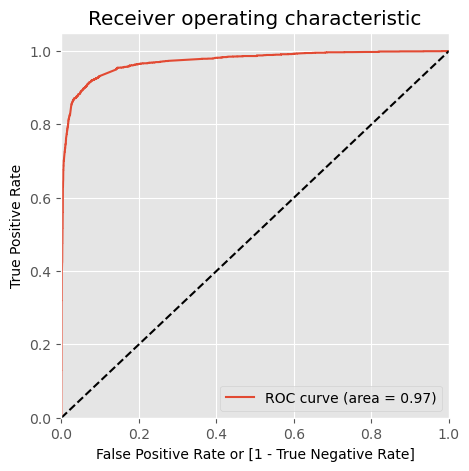

In [147]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

Generally, the ROC Curve should be a value close to 1 to be a good model. Here we are getting a good value of 0.97 indicating a good predictive model.

# Finding Optimal Cutoff Point

In [148]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105083,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.011927,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.155025,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.039656,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996929,3241,1,1,1,1,1,1,1,1,1,1,1


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.849914  0.966639  0.777891
0.2   0.2  0.914191  0.927924  0.905718
0.3   0.3  0.922678  0.914333  0.927827
0.4   0.4  0.925035  0.898682  0.941296
0.5   0.5  0.927707  0.878913  0.957814
0.6   0.6  0.929593  0.863674  0.970267
0.7   0.7  0.919378  0.821252  0.979924
0.8   0.8  0.910734  0.792010  0.983990
0.9   0.9  0.889832  0.725700  0.991105


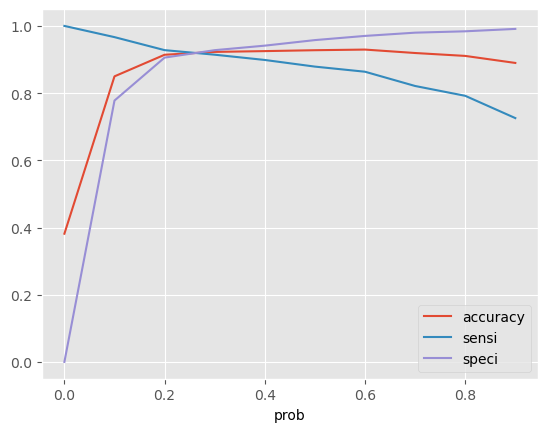

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [151]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.105083,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.011927,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.155025,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039656,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996929,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.105083,302,0,11
1,0,0.011927,6087,0,1
2,0,0.155025,1033,0,16
3,0,0.039656,7656,0,4
4,1,0.996929,3241,1,100


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9226779820839227

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3651,  284],
       [ 208, 2220]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.914332784184514

In [157]:
#specificity of our logistic regression model
TN / float(TN+FP)

0.9278271918678526

# Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.26%

Sensitivity : 91.43%

Specificity : 92.78%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [158]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0721728081321474


In [159]:
# Positive predictive value
print (TP / float(TP+FP))

0.8865814696485623


In [160]:
# Negative predictive value
print (TN / float(TN+FN))

0.9461000259134491


In [161]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3651,  284],
       [ 208, 2220]], dtype=int64)

In [162]:
# Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8865814696485623

In [163]:
# Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.914332784184514

In [164]:
from sklearn.metrics import precision_score, recall_score

In [165]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8865814696485623

In [166]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.914332784184514

In [167]:
from sklearn.metrics import precision_recall_curve

In [168]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

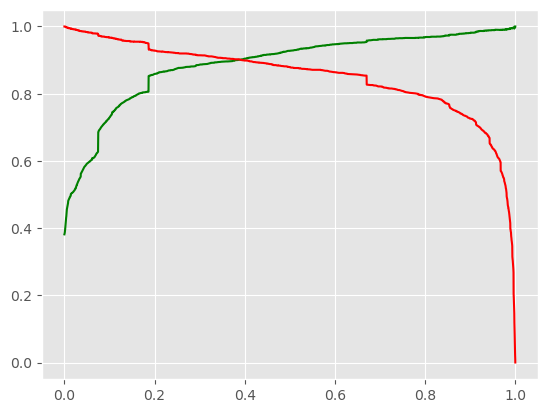

In [169]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [170]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
6906,0.0,4,1.891958,-0.154745,-0.685047,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1873,0.0,2,-0.542475,-0.154745,-0.685047,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
771,0.0,7,-0.790628,2.446282,-0.685047,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4495,0.0,4,-0.618551,0.885666,1.459755,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9061,0.0,2,2.359282,-0.154745,1.459755,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
X_test[['Do Not Call', 'Total Time Spent on Website', 'Page Views Per Visit','A free copy of Mastering The Interview']] = scaler.transform(X_test[['Do Not Call', 'Total Time Spent on Website', 'Page Views Per Visit','A free copy of Mastering The Interview']])

In [172]:
col = X_train.columns

# PREDICTIONS ON TEST SET

In [173]:
# Select the columns in X_train for X_test as well
X_test = X_train[col]
X_test

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
302,-0.017732,1.336782,-0.428736,0.044021,-0.659091,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,-0.017732,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,-0.017732,0.642022,-0.025151,1.477269,-0.659091,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7656,-0.017732,0.989402,-0.241619,2.014065,1.517242,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,-0.017732,0.294642,0.897591,-0.492776,1.517242,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.017732,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
81,-0.017732,-0.052738,-0.252626,-0.133122,-0.659091,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8171,-0.017732,1.336782,1.130570,0.044021,1.517242,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
7048,-0.017732,2.031542,1.374555,1.208870,1.517242,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [174]:
X_test_sm = sm.add_constant(X_test)

In [175]:
X_test_sm

,const,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,specialization_Industry Specializations,specialization_Management Specializations,city_Non-Mumbai Maharashtra Cities
302,1.0,-0.017732,1.336782,-0.428736,0.044021,-0.659091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6087,1.0,-0.017732,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,1.0,-0.017732,0.642022,-0.025151,1.477269,-0.659091,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7656,1.0,-0.017732,0.989402,-0.241619,2.014065,1.517242,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3241,1.0,-0.017732,0.294642,0.897591,-0.492776,1.517242,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.0,-0.017732,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
81,1.0,-0.017732,-0.052738,-0.252626,-0.133122,-0.659091,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8171,1.0,-0.017732,1.336782,1.130570,0.044021,1.517242,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7048,1.0,-0.017732,2.031542,1.374555,1.208870,1.517242,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [176]:
#y_test_pred = res.predict(X_test_sm)

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [178]:
Xscaled  = scaler.fit_transform(X_train)
logreg.fit(Xscaled, y_train.values.ravel())
y_test_pred = logreg.predict(scaler.fit_transform(X_test))

In [179]:
y_test_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [180]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [181]:
#check the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,1


In [182]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [183]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [184]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [186]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1.0,6906.0,0
1,0.0,1873.0,0
2,0.0,771.0,0
3,0.0,4495.0,0
4,1.0,9061.0,1


In [187]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [188]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1.0,6906.0,0
1,0.0,1873.0,0
2,0.0,771.0,0
3,0.0,4495.0,0
4,1.0,9061.0,1


In [189]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [190]:
#head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6906.0,1.0,0,0
1,1873.0,0.0,0,0
2,771.0,0.0,0,0
3,4495.0,0.0,0,0
4,9061.0,1.0,1,100


In [191]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,6906.0,1.0,0,0,0
1,1873.0,0.0,0,0,0
2,771.0,0.0,0,0,0
3,4495.0,0.0,0,0,0
4,9061.0,1.0,1,100,1


In [193]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.914332784184514

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.9278271918678526

In [196]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8865814696485623

In [197]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.914332784184514

# Observation:

We have the following values for the Train Data:

Accuracy : 92.26%

Sensitivity : 91.43%

Specificity : 92.78%




After running the model on the Test Data these are the figures we obtain

Sensitivity : 91%

Specificity : 92%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.